In [2]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics

<h3>Prueba de la clase EstrategiaParticionado<h3>

In [3]:
k = 3
p = 0.3
nEjecuciones = 3

n_datos = 10

dataset = Datos("tic-tac-toe.data")

#Cambio estrategia particionado comentar

Se prueba primero ValidacionSimple. Para visualizar mejor la partición, solo se usan los n_datos = 10 primeros datos del dataset. En general, el parametro n_datos debería ser igual al número de datos en el dataset. 

In [5]:

estrategia_simple = ValidacionSimple(p, nEjecuciones)
particiones_simple = estrategia_simple.creaParticiones(n_datos)

for particion in particiones_simple:
    datos_test = dataset.extraeDatos(particion.indicesTest)
    datos_train = dataset.extraeDatos(particion.indicesTrain)
    print("Test:", str(datos_test))
    print("Train:", str(datos_train))
    print()
    

Test: [array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'b', 'o', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b', 'positive'],
      dtype=object)]
Train: [array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'b', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object)]

Test: [array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o',

Prueba de ValidacionCruzada con parametro k = 3. Igual que en el caso anterior, para facilitar la visualización solo se usan los 10 primeros datos (n_datos). 

In [6]:
estrategia_cruzada = ValidacionCruzada(k)
particiones_cruzada = estrategia_cruzada.creaParticiones(n_datos)

for particion in particiones_cruzada:

    datos_test = dataset.extraeDatos(particion.indicesTest)
    datos_train = dataset.extraeDatos(particion.indicesTrain)
    print("Test:", str(datos_test))
    print("Train:", str(datos_train))
    print()

Test: [array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'b', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'o', 'x', 'positive'],
      dtype=object)]
Train: [array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'x', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'x', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'b', 'o', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'o', 'b', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'b', 'o', 'b', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o', 'o', 'o', 'b', 'b', 'positive'],
      dtype=object)]

Test: [array(['x', 'x', 'x', 'x', 'o', 'b', 'b', 'o', 'o', 'positive'],
      dtype=object), array(['x', 'x', 'x', 'x', 'o',

Imprimimos los indices para validación simple y cruzada para n_datos = 30:

In [7]:
seed = 0

estrategia_simple = ValidacionSimple(p, nEjecuciones)
particiones_simple = estrategia_simple.creaParticiones(30, seed=seed)

estrategia_cruzada = ValidacionCruzada(k)
particiones_cruzada = estrategia_cruzada.creaParticiones(30, seed=seed)

print('Particion Simple')

for particion in particiones_simple:
    print('Test:', particion.indicesTest)
    print('Train:', particion.indicesTrain)
    print()

print('Particion Cruzada')

for particion in particiones_cruzada:
    print('Test:', particion.indicesTest)
    print('Train:', particion.indicesTrain)
    print()

Particion Simple
Test: [3, 10, 18, 17, 5, 0, 7, 26, 29]
Train: [14, 20, 25, 21, 2, 19, 4, 23, 6, 11, 22, 9, 28, 15, 16, 8, 1, 13, 24, 12, 27]

Test: [21, 5, 17, 14, 15, 13, 11, 0, 26]
Train: [1, 24, 28, 8, 12, 27, 18, 3, 16, 10, 29, 23, 19, 4, 6, 7, 9, 22, 20, 2, 25]

Test: [5, 11, 12, 4, 28, 19, 21, 25, 20]
Train: [8, 23, 29, 7, 13, 26, 10, 22, 1, 14, 18, 3, 24, 6, 17, 27, 16, 2, 15, 9, 0]

Particion Cruzada
Test: [3, 10, 18, 17, 5, 0, 7, 26, 29, 14]
Train: [20, 25, 21, 2, 19, 4, 23, 6, 11, 22, 9, 28, 15, 16, 8, 1, 13, 24, 12, 27]

Test: [20, 25, 21, 2, 19, 4, 23, 6, 11, 22]
Train: [3, 10, 18, 17, 5, 0, 7, 26, 29, 14, 9, 28, 15, 16, 8, 1, 13, 24, 12, 27]

Test: [9, 28, 15, 16, 8, 1, 13, 24, 12, 27]
Train: [3, 10, 18, 17, 5, 0, 7, 26, 29, 14, 20, 25, 21, 2, 19, 4, 23, 6, 11, 22]



Siendo $test_n$ el conjunto de test de la ejecución n (analogamente para $train_n$). Lo que tenemos para la estrategia simple es que la intersección entre $test_i$ y $test_j$ no es necesariamente vacía. Mientras que para la estrategia cruzada se garantiza que sea vacía. Además, en la estrategia cruzada, se tiene que la unión de todos los $test_i$ sea igual al conjunto total. 

Entonces, una ventaja de la validación cruzada es que permite evaluar la precisión del modelo con todos los datos del dataset, mientras que, por la aleatoriedad de la elección, en la validación simple puede haber datos que en ninguna iteración estuviesen en el conjunto de test.

Por otra parte, la estrategia simple es más sencilla de implementar. También, con nEjecuciones = 1 es más rapida que la validación cruzada.

En caso de tener suficientes datos no es necesario utilizar validación cruzada ni nEjecuciones > 1 ya que el conjunto de test tendrá datos suficientes para dar una estimación realista de la precisión del modelo. Por otro lado, la validación cruzada es muy útil en un conjunto de datos pequeño ya que la desviación típica (decreciente con el tamaño de la muestra) podría ser relativamente grande y, por tanto, sería necesario promediar los errores para dar una estimación del error más realista. 

<h3>Prueba de la clase Clasificacion<h3>

Primero se necesita obtener los datos en un formato correcto.

In [8]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)
p = 0.2
seed = 0

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

Después, crear las particiones datostrain y datostest. En este caso de prueba utilizaremos validacionSimple con nEjecuciones = 1.

In [9]:
vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)

Ahora, se entrena el modelo utilizando el conjunto datostrain

In [10]:
cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

Y, por último se predice la clase para datostest utilizando los porcentajes obtenidos. 

In [11]:
prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

Mostramos la precisión de nuestra predicción:

In [12]:
print(1-cl.error(datostest, prediccion))

0.6875


Hemos obtenido aproximadamente un 69% de aciertos en este dataset y partición. Vamos a probar ahora los datos "german.data" haciendo las mismas operaciones que en el caso anterior.

In [13]:
archivo = 'german.data'

dataset = Datos(archivo)
p = 0.2
seed = 0

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  


In [14]:
vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)

In [15]:
cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

In [16]:
prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

In [17]:
print(1-cl.error(datostest, prediccion))

0.76


El modelo acierta en aproximadamente 76% de los casos. 

Una vez hechas las pruebas, vamos a analizar la precisión media de los clasificadores. Primero sin la correción de Laplace. 

<h5>Estrategia de particionado: Validación Simple</h5>


Parámetros: nEjecuciones = 10, p = 0.2, archivo: 'tic-tac-toe.data'

In [18]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

In [19]:
p = 0.2
nEjecuciones = 10
seed = 0

vs = ValidacionSimple(p, nEjecuciones)

In [20]:
cl = ClasificadorNaiveBayes()
errores_vs_a1 = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=0, seed=0)

Calculamos la media y la desviación tipica de los errores:

In [21]:
media_vs_a1 = np.mean(errores_vs_a1)
desv_vs_a1 = np.std(errores_vs_a1)

print(media_vs_a1, desv_vs_a1)

0.3026041666666666 0.03700849775727191


Hacemos lo mismo para el otro conjunto de datos

In [22]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  

In [26]:
p = 0.2
nEjecuciones = 10
seed = 0

vs = ValidacionSimple(p, nEjecuciones)

In [27]:
cl = ClasificadorNaiveBayes()
errores_vs_a2 = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=0, seed=seed)

In [28]:
media_vs_a2 = np.mean(errores_vs_a2)
desv_vs_a2 = np.std(errores_vs_a2)

print(media_vs_a2, desv_vs_a2)

0.2545 0.025927784324928344


<h5>Estrategia de particionado: Validación Cruzada con k=10</h5>

tic-tac-toe.data

In [29]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

k = 10
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a1 = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, alpha = 0, seed=0)

media_vc_a1 = np.mean(errores_vc_a1)
desv_vc_a1 = np.std(errores_vc_a1)

print(media_vc_a1, desv_vc_a1)

0.3042105263157895 0.05058111063887985


german.data

In [30]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

k = 10
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a2 = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=0, seed=0)

media_vc_a2 = np.mean(errores_vc_a2)
desv_vc_a2 = np.std(errores_vc_a2)

print(media_vc_a2, desv_vc_a2)

0.242 0.0342928563989645


Con la corrección de Laplace (alpha = 1)

In [34]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

k = 10
p = 0.2
nEjecuciones = 10
vs = ValidacionSimple(p, nEjecuciones)
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a1_l = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=1, seed=0)

media_vc_a1_l = np.mean(errores_vc_a1_l)
desv_vc_a1_l = np.std(errores_vc_a1_l)

errores_vs_a1_l = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=1, seed=0)

media_vs_a1_l = np.mean(errores_vs_a1_l)
desv_vs_a1_l = np.std(errores_vs_a1_l)

In [35]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
        
k = 10
p = 0.2
nEjecuciones = 10

vs = ValidacionSimple(p, nEjecuciones)
vc = ValidacionCruzada(k)

cl = ClasificadorNaiveBayes()
errores_vc_a2_l = cl.validacion(vc, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=1, seed=0)

media_vc_a2_l = np.mean(errores_vc_a2_l)
desv_vc_a2_l = np.std(errores_vc_a2_l)

errores_vs_a2_l = cl.validacion(vs, dataset, dataset.diccionario, dataset.nominalAtributos, alpha=1, seed=0)

media_vs_a2_l = np.mean(errores_vs_a2_l)
desv_vs_a2_l = np.std(errores_vs_a2_l)

Imprimimos todos los datos juntos:

In [36]:
print('\ttic-tac-toe\t\tgerman')
print('VS', '\t(', round(media_vs_a1, 3), round(desv_vs_a1,3), ')\t\t(', round(media_vs_a2, 3), round(desv_vs_a2,3), ')')
print('VC', '\t(', round(media_vc_a1, 3), round(desv_vc_a1,3), ')\t\t(', round(media_vc_a2, 3), round(desv_vc_a2,3), ')')
print('VS_L\t(', round(media_vs_a1_l, 3), round(desv_vs_a1_l,3), ')\t\t(', round(media_vs_a2_l, 3), round(desv_vs_a2_l,3), ')')
print('VC_L\t(', round(media_vc_a1_l, 3), round(desv_vc_a1_l,3), ')\t\t(', round(media_vc_a2_l, 3), round(desv_vc_a2_l,3), ')')

	tic-tac-toe		german
VS 	( 0.303 0.037 )		( 0.254 0.026 )
VC 	( 0.304 0.051 )		( 0.242 0.034 )
VS_L	( 0.303 0.037 )		( 0.254 0.026 )
VC_L	( 0.304 0.051 )		( 0.242 0.034 )


No se aprecia una gran diferencia entre validación simple y validación cruzada, de hecho las medias son prácticamente iguales, aunque la desviación tipica es algo mejor en el caso de validación simple. 

Y, respecto a la diferencia entre ambos archivos, parece que la predicción para german.data es algo más precisa. 

En ambos casos, la desviación típica es pequeña, por tanto cabe esperar que el error cometido se encuentre cerca de la media calculada. 

Los resultados con corrección de Laplace son iguales a los resultados sin esta. Esto se debe a que en el conjunto de antrenamiento no aparecen atributos tales que un valor de este no aparezca (aparezca 0 veces) dada una clase. 

<h3>Scikit-Learn</h3>

En el caso de Scikit-Learn, no hay una función que te permita tratar ciertos datosz como categóricos y ciertos datos del mismo dataset como continuos. Por tanto, utilizaremos MultinomialNB para el caso de datos categóricos (tic-tac-toe.data) y GaussianNB para el caso de que haya algún dato continuo (german.data).

Primero empezamos con las pruebas de validación simple y con tic-tac-toe.data. Transformamos los datos al formato adecuado y realizamos la partición:

In [37]:
archivo = 'tic-tac-toe.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

Procedemos con la clasificación. Haremos una prueba sin Laplace (alpha=0) y otra con Laplace (alpha=1):

In [38]:
mnb0 = MultinomialNB(alpha=0)

mnb0.fit(X_train, y_train)

y_pred0 = mnb0.predict(X_test)

ac_tic_simple_0 = metrics.accuracy_score(y_test, y_pred0)
print("Accuracy:", ac_tic_simple_0)


Accuracy: 0.6197916666666666


c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [39]:
mnb1 = MultinomialNB(alpha=1)

mnb1.fit(X_train, y_train)

y_pred1 = mnb1.predict(X_test)

ac_tic_simple_1 = metrics.accuracy_score(y_test, y_pred1)
print("Accuracy:", ac_tic_simple_1)

Accuracy: 0.6197916666666666


Observamos que no hay diferencia entre haber utilizado Laplace y no haberlo utilizado. Puede que en este caso haya sido así, pero en general es buena idea utilizar Laplace, porque no se sabe como es el dataset, y podría ocurrir que alguna de las probabilidades condicionadas fuesen 0.

Procedemos a realizar la misma prueba, pero esta vez utilizando validación cruzada:

In [40]:
archivo = 'tic-tac-toe.data'
p = 0.2
seed = 123
k = 10

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')


In [41]:
mnb2 = MultinomialNB(alpha=0)

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

ac_tic_cruzada_0 = np.empty(k)

cnt = 0
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    mnb2.fit(X_train, y_train)

    y_pred2 = mnb2.predict(X_test)

    ac_tic_cruzada_0[cnt] = metrics.accuracy_score(y_test, y_pred2)

    print("Accuracy:", ac_tic_cruzada_0[cnt])
    cnt += 1

Accuracy: 0.6041666666666666
Accuracy: 0.6979166666666666
Accuracy: 0.5625
Accuracy: 0.6875
Accuracy: 0.6875
Accuracy: 0.6770833333333334
Accuracy: 0.6354166666666666
Accuracy: 0.6145833333333334
Accuracy: 0.7052631578947368
Accuracy: 0.6947368421052632


c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
c:\users\admitin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\nai

In [42]:
mnb3 = MultinomialNB(alpha=1)

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

ac_tic_cruzada_1 = np.empty(k)
cnt = 0
for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    mnb3.fit(X_train, y_train)

    y_pred3 = mnb3.predict(X_test)

    ac_tic_cruzada_1[cnt] = metrics.accuracy_score(y_test, y_pred3)

    print("Accuracy:", ac_tic_cruzada_1[cnt])
    cnt += 1

Accuracy: 0.6041666666666666
Accuracy: 0.6979166666666666
Accuracy: 0.5625
Accuracy: 0.6875
Accuracy: 0.6875
Accuracy: 0.6770833333333334
Accuracy: 0.6354166666666666
Accuracy: 0.6145833333333334
Accuracy: 0.7052631578947368
Accuracy: 0.6947368421052632


De nuevo, observamos que Laplace no influye

Pasamos a utilizar el dataset german.data y repetimos las mismas pruebas:

In [43]:
archivo = 'german.data'
p = 0.2
seed = 123

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j]:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

In [45]:
gnb0 = GaussianNB()

gnb0.fit(X_train, y_train)

y_pred4 = gnb0.predict(X_test)
ac_german_simple = metrics.accuracy_score(y_test, y_pred4) 
print("Accuracy:", ac_german_simple)


Accuracy: 0.75


In [46]:
gnb1 = GaussianNB()

kf = KFold(n_splits=k, random_state=seed, shuffle=True)

ac_german_cruzada = np.empty(k)
cnt = 0

for train, test in kf.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    
    gnb1.fit(X_train, y_train)

    y_pred5 = gnb1.predict(X_test)
    
    ac_german_cruzada[cnt] = metrics.accuracy_score(y_test, y_pred5)

    print("Accuracy:", ac_german_cruzada[cnt])
    cnt += 1

Accuracy: 0.74
Accuracy: 0.77
Accuracy: 0.75
Accuracy: 0.77
Accuracy: 0.68
Accuracy: 0.76
Accuracy: 0.77
Accuracy: 0.7
Accuracy: 0.75
Accuracy: 0.66


Analizamos todos los resultados obtenidos y los comparamos con nuestra implementación. Como los resultados con y sin Laplace son iguales en el caso de Scikit, ignoraremos Laplace:

In [47]:
print('\ttic-tac-toe scikit\ttic-tac-toe propio\tgerman scikit\t\tgerman propio')
print('VS\t(', round(1-ac_tic_simple_0, 3), ')\t\t(', round(media_vs_a1, 3), round(desv_vs_a1,3), ')\t\t(', round(1-ac_german_simple, 3), ')\t\t(', round(media_vs_a2, 3), round(desv_vs_a2,3), ')')
print('VC\t(', round(np.mean(1-ac_tic_cruzada_0), 3), round(np.std(1-ac_tic_cruzada_0),3), ')\t\t(', round(media_vc_a1, 3), round(desv_vc_a1,3), ')\t\t(', round(np.mean(1-ac_german_cruzada), 3), round(np.std(1-ac_german_cruzada),3), ')\t\t(', round(media_vc_a2, 3), round(desv_vc_a2,3), ')')


	tic-tac-toe scikit	tic-tac-toe propio	german scikit		german propio
VS	( 0.38 )		( 0.303 0.037 )		( 0.25 )		( 0.254 0.026 )
VC	( 0.343 0.047 )		( 0.304 0.051 )		( 0.265 0.038 )		( 0.242 0.034 )


En general, parece que nuestro estimador comete menos errores que el de Scikit para estos datos y esta semilla. Habría que realizar pruebas mas extensas para medir las calidades y comparar ambos esitimadores adecuadamente.

<h3>Evaluación de hipótesis mediante Análisis ROC</h3>

Vamos a realizar este análisis para cada tipo de validación y para cada dataset.

In [48]:
p = 0.2
seed = 0
k = 10

def get_ROC_data(conf_data, clases, ocurrencias_clases):
    
    matriz_conf = np.zeros((2, 2))
    matriz_conf[0][0] = ocurrencias_clases[clases[1]]
    matriz_conf[0][1] = ocurrencias_clases[clases[0]]
    tpr = np.empty(len(datostest))
    fpr = np.empty(len(datostest))

    for i in range(len(conf_data)):
        if conf_data[i][1] == clases[0]: # Dato negativo
            matriz_conf[1][1] += 1 #TN
            matriz_conf[0][1] -= 1 #FP

        else: # Dato positivo
            matriz_conf[1][0] += 1 #FN
            matriz_conf[0][0] -= 1 #TP


        tpr[i] = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0])

        fpr[i] = matriz_conf[0][1]/(matriz_conf[0][1]+matriz_conf[1][1])
    
    return tpr, fpr

def get_matriz_conf(datostest, prediccion, clases):
    matriz_conf = np.zeros((2, 2))
    
    for i in range(len(datostest)):
        if prediccion[i] == clases[0]:
            if datostest[i][-1] == clases[0]: # TN
                matriz_conf[1][1] += 1
            else: # FN 
                matriz_conf[1][0] += 1
        else:
            if datostest[i][-1] == clases[0]: # FP
                matriz_conf[0][1] += 1
            else: # TP
                matriz_conf[0][0] += 1
    
    return matriz_conf

<h5>tic-tac-toe.data y validación simple</h5>

In [49]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


Pasamos a construir los datos necesarios para la curva ROC y a obtener la matriz de confusión. Como anotación, se asume que la clase negativa es la de menor valor y la positiva la de mayor valor.

In [50]:
tpr_tic_simple, fpr_tic_simple = get_ROC_data(conf_data, clases, counts)
matriz_conf_tic_simple = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [51]:
print("Matriz de confusión tic-tac-toe.data validación simple")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_tic_simple[0][0], " \t\t ", matriz_conf_tic_simple[0][1])
print("\t Negativo ", matriz_conf_tic_simple[1][0], " \t\t ", matriz_conf_tic_simple[1][1])

Matriz de confusión tic-tac-toe.data validación simple

				Real
		  Positivo		Negativo
Estimado Positivo  101.0  		  46.0
	 Negativo  14.0  		  31.0


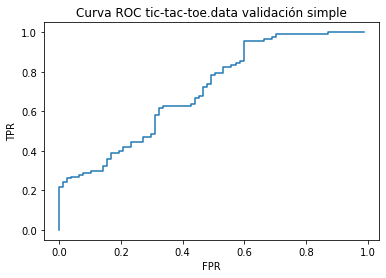

In [52]:
plt.figure()
plt.plot(fpr_tic_simple, tpr_tic_simple)
plt.title("Curva ROC tic-tac-toe.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h5>tic-tac-toe.data y validación cruzada con k=10</h5>

In [53]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_tic_cruzada = []
tpr_tic_cruzada_lista = []
fpr_tic_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)


    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    tpr_tic_cruzada, fpr_tic_cruzada = get_ROC_data(conf_data, clases, counts)
    matriz_conf_tic_cruzada = get_matriz_conf(datostest, prediccion, clases)
    matrices_conf_tic_cruzada.append(matriz_conf_tic_cruzada)
    tpr_tic_cruzada_lista.append(tpr_tic_cruzada)
    fpr_tic_cruzada_lista.append(fpr_tic_cruzada)

In [54]:
for i in range(k):
    print("Matriz de confusión tic-tac-toe.data validación cruzada fold", i+1)
    print()
    print("\t\t\t\tReal")
    print("\t\t  Positivo\t\tNegativo")
    print("Estimado Positivo ", matrices_conf_tic_cruzada[i][0][0], " \t\t ", matrices_conf_tic_cruzada[i][0][1])
    print("\t Negativo ", matrices_conf_tic_cruzada[i][1][0], " \t\t ", matrices_conf_tic_cruzada[i][1][1])
    print()

Matriz de confusión tic-tac-toe.data validación cruzada fold 1

				Real
		  Positivo		Negativo
Estimado Positivo  55.0  		  18.0
	 Negativo  7.0  		  15.0

Matriz de confusión tic-tac-toe.data validación cruzada fold 2

				Real
		  Positivo		Negativo
Estimado Positivo  45.0  		  26.0
	 Negativo  6.0  		  18.0

Matriz de confusión tic-tac-toe.data validación cruzada fold 3

				Real
		  Positivo		Negativo
Estimado Positivo  55.0  		  23.0
	 Negativo  9.0  		  8.0

Matriz de confusión tic-tac-toe.data validación cruzada fold 4

				Real
		  Positivo		Negativo
Estimado Positivo  60.0  		  18.0
	 Negativo  8.0  		  9.0

Matriz de confusión tic-tac-toe.data validación cruzada fold 5

				Real
		  Positivo		Negativo
Estimado Positivo  62.0  		  14.0
	 Negativo  7.0  		  12.0

Matriz de confusión tic-tac-toe.data validación cruzada fold 6

				Real
		  Positivo		Negativo
Estimado Positivo  49.0  		  16.0
	 Negativo  20.0  		  10.0

Matriz de confusión tic-tac-toe.data validación cruzada fol

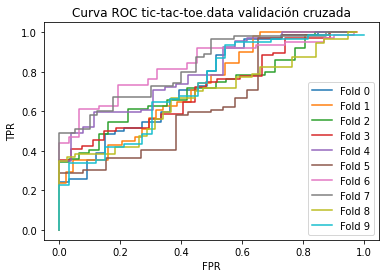

In [56]:
plt.figure()

for i in range(k):
    plt.plot(fpr_tic_cruzada_lista[i], tpr_tic_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC tic-tac-toe.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

<h5>german.data y validación simple</h5>

In [62]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [63]:
tpr_german_simple, fpr_german_simple = get_ROC_data(conf_data, clases, counts)
matriz_conf_german_simple = get_matriz_conf(datostest, prediccion, clases)

In [64]:
print("Matriz de confusión german.data validación simple")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_german_simple[0][0], " \t\t ", matriz_conf_german_simple[0][1])
print("\t Negativo ", matriz_conf_german_simple[1][0], " \t\t ", matriz_conf_german_simple[1][1])

Matriz de confusión german.data validación simple

				Real
		  Positivo		Negativo
Estimado Positivo  30.0  		  13.0
	 Negativo  35.0  		  122.0


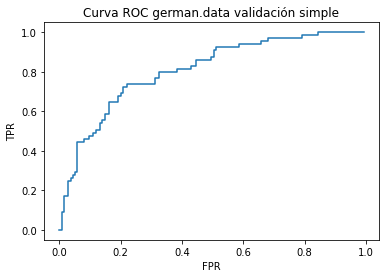

In [65]:
plt.figure()
plt.plot(fpr_german_simple, tpr_german_simple)
plt.title("Curva ROC german.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h5>german.data y validación cruzada con k=10</h5>

In [66]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_german_cruzada = []
tpr_german_cruzada_lista = []
fpr_german_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)

    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    tpr_german_cruzada, fpr_german_cruzada = get_ROC_data(conf_data, clases, counts)
    matriz_conf_german_cruzada = get_matriz_conf(datostest, prediccion, clases)
    matrices_conf_german_cruzada.append(matriz_conf_german_cruzada)
    tpr_german_cruzada_lista.append(tpr_german_cruzada)
    fpr_german_cruzada_lista.append(fpr_german_cruzada)

In [67]:
for i in range(k):
    print("Matriz de confusión german.data validación cruzada fold", i+1)
    print()
    print("\t\t\t\tReal")
    print("\t\t  Positivo\t\tNegativo")
    print("Estimado Positivo ", matrices_conf_german_cruzada[i][0][0], " \t\t ", matrices_conf_german_cruzada[i][0][1])
    print("\t Negativo ", matrices_conf_german_cruzada[i][1][0], " \t\t ", matrices_conf_german_cruzada[i][1][1])
    print()

Matriz de confusión german.data validación cruzada fold 1

				Real
		  Positivo		Negativo
Estimado Positivo  12.0  		  5.0
	 Negativo  23.0  		  60.0

Matriz de confusión german.data validación cruzada fold 2

				Real
		  Positivo		Negativo
Estimado Positivo  19.0  		  7.0
	 Negativo  11.0  		  63.0

Matriz de confusión german.data validación cruzada fold 3

				Real
		  Positivo		Negativo
Estimado Positivo  17.0  		  11.0
	 Negativo  14.0  		  58.0

Matriz de confusión german.data validación cruzada fold 4

				Real
		  Positivo		Negativo
Estimado Positivo  16.0  		  7.0
	 Negativo  12.0  		  65.0

Matriz de confusión german.data validación cruzada fold 5

				Real
		  Positivo		Negativo
Estimado Positivo  19.0  		  10.0
	 Negativo  16.0  		  55.0

Matriz de confusión german.data validación cruzada fold 6

				Real
		  Positivo		Negativo
Estimado Positivo  12.0  		  10.0
	 Negativo  13.0  		  65.0

Matriz de confusión german.data validación cruzada fold 7

				Real
		  Positivo		Neg

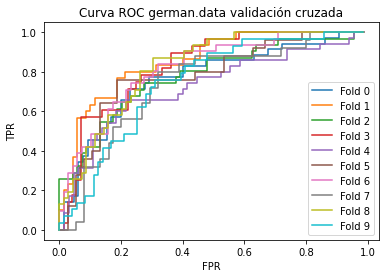

In [68]:
plt.figure()

for i in range(k):
    plt.plot(fpr_german_cruzada_lista[i], tpr_german_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC german.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

A continuación, vamos a calcular las áreas bajo las curvas ROC (AUC) para determinar la calidad de cada método:

In [69]:
def AUC(fpr, tpr):

    auc = 0
    for i in range(len(tpr)-1):
        auc += (fpr[i]-fpr[i+1])*tpr[i]
    
    auc += fpr[-1]*tpr[-1]
        
    return auc

In [70]:
auc_tic_simple = AUC(fpr_tic_simple, tpr_tic_simple)
auc_german_simple = AUC(fpr_german_simple, tpr_german_simple)

auc_tic_cruzada_lista = []
auc_german_cruzada_lista = []

for i in range(len(fpr_tic_cruzada_lista)):
    auc_tic_cruzada_lista.append(AUC(fpr_tic_cruzada_lista[i], tpr_tic_cruzada_lista[i]))
    auc_german_cruzada_lista.append(AUC(fpr_german_cruzada_lista[i], tpr_german_cruzada_lista[i]))

In [71]:
print("AUC tic-tac-toe.data VS:", auc_tic_simple)

print()
for i in range(len(auc_tic_cruzada_lista)):
    print("AUC tic-tac-toe.data VC Fold " + str(i+1) + ":" , auc_tic_cruzada_lista[i])

print()
print("AUC tic-tac-toe.data VC media: ", np.mean(auc_tic_cruzada_lista))
print()
print("AUC german.data VS:", auc_german_simple)

print()
for i in range(len(auc_german_cruzada_lista)):
    print("AUC german.data VC Fold " + str(i+1) + ":" , auc_german_cruzada_lista[i])
    
print()
print("AUC german.data VC media: ", np.mean(auc_german_cruzada_lista))

AUC tic-tac-toe.data VS: 0.6961038961038958

AUC tic-tac-toe.data VC Fold 1: 0.7077223851417398
AUC tic-tac-toe.data VC Fold 2: 0.7045454545454549
AUC tic-tac-toe.data VC Fold 3: 0.6869959677419355
AUC tic-tac-toe.data VC Fold 4: 0.6775599128540304
AUC tic-tac-toe.data VC Fold 5: 0.7564102564102562
AUC tic-tac-toe.data VC Fold 6: 0.6059085841694537
AUC tic-tac-toe.data VC Fold 7: 0.7973790322580646
AUC tic-tac-toe.data VC Fold 8: 0.8027272727272731
AUC tic-tac-toe.data VC Fold 9: 0.6509695290858727
AUC tic-tac-toe.data VC Fold 10: 0.7282502443792764

AUC tic-tac-toe.data VC media:  0.7118468639313358

AUC german.data VS: 0.7997720797720789

AUC german.data VC Fold 1: 0.750769230769231
AUC german.data VC Fold 2: 0.8409523809523808
AUC german.data VC Fold 3: 0.7648433847592331
AUC german.data VC Fold 4: 0.8169642857142847
AUC german.data VC Fold 5: 0.7085714285714294
AUC german.data VC Fold 6: 0.7669333333333334
AUC german.data VC Fold 7: 0.8027115474520803
AUC german.data VC Fold 8: 0.7

En cuanto al dataset tic-tac-toe.data, observamos unos mejores resultados en el caso de la validación cruzada. Sin embargo, en el caso de german.data hay mejores resultados con la validación simple.

<h4> Comentarios respecto a modificaciones en el diseño de clases <h4>

En la clase EstrategiaParticionado, en la función creaParticiones cambiamos los parametros recomendados por un parametro n_datos, ya que en nuestra opinión es el único parámetro necesario para crear los conjuntos de indices. Con esto, deja de ser necesario pasar a la función una instancia de la clase Datos.

A la hora de entrenamiento y clasificación, modificamos el conjunto de datos a un formado adecuado (cambiar los atributos nominales a un entero siguiendo el orden alfabético) utilizando el diccionario fuera de las funciones de la clase Clasificador. Esto nos parece más adecuado en cuanto a la separación las funcionalidades. 

También, tenemos el criterio de transformar la clase a su valor en el diccionario, sea el atributo nominal o numérico ya que la clase siempre es discreta. 
Esto permite simplificar el codigo gracias a la posible indexación array[valor1_clase].

Asumimos la equivalencia entre nominalAtributos de la clase Datos y el parámetro atributosDiscretos que se pasa a las funciones de la clase Clasificador (con esta suposición resulta coherente transformar los valores de clase, atributo discreto, siempre a un entero entre 0 y n_valores). 

En la función clasifica añadimos el atributo alpha, el parámetro de la corrección de Laplace. 

Por último, cambiamos los atributos que se pasan a la función validacion de la clase Clasificador añadiendo todos aquellos atributos necesarios para llamar a las funciones entrenamiento y clasifica. También, eliminamos el parametro clasificador llamando a la función validación como instancia_clasificador.validacion(...).